# This practice will cover learning points in class2
### 1 - Fit MLR model in python with sklearn and statesmodel packages
### 2 - Model Selection
### 3 - Weighted regression
### 4 - Regularization, L1 and L2

Import required Python packages.

In [62]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

%matplotlib inline

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [63]:
DATA = Path('.').resolve().parents[1] /'Practice\mlr'

HOUSE_CSV =DATA/ 'house_sales.csv'

In [64]:
print(DATA)
print(HOUSE_CSV)

/Users/siyuandong/Documents/Data Scientist Bootcamp/DataScienceProgram/Class2/Practice\mlr
/Users/siyuandong/Documents/Data Scientist Bootcamp/DataScienceProgram/Class2/Practice\mlr/house_sales.csv


#### Data read and train-test split

In [65]:
houseall = pd.read_csv('house_sales.csv', sep='\t')

house, house_test = train_test_split(houseall, test_size=0.2)

print(house.head())
print(house.shape)

print(house_test.head())
print(house_test.shape)

      DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
5947    2009-10-13     425000  1954410300  Single Family  2009-10-01   351200   
10404   2006-07-14     434700  3275910040  Single Family  2006-07-01   407700   
3544    2012-07-13     224750  1310970500  Single Family  2012-07-01   325300   
26163   2007-06-15     493000  9485930400  Single Family  2007-06-01   433200   
13934   2009-06-25     720000  4077800070  Single Family  2009-06-01   357100   

       zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot  ...  Bathrooms  \
5947   0.806985      526651.0               1     7477  ...       2.25   
10404  0.936811      464021.0               1     5970  ...       2.50   
3544   0.747472      300680.0               1     7210  ...       2.25   
26163  0.995404      495276.0               1    37376  ...       2.75   
13934  0.820542      877468.0               1     5514  ...       2.75   

       Bedrooms  BldgGrade  YrBuilt  YrRenovated  TrafficNoise  Land

We can use the `LinearRegression` model from _scikit-learn_.

## 1 - Multiple Linear Regression (SKlearn)

In [66]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

print(house[subset].head())

       AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
5947       526651.0           1680     7477       2.25         3          8
10404      464021.0           2181     5970       2.50         4          8
3544       300680.0           2110     7210       2.25         4          8
26163      495276.0           2390    37376       2.75         4          8
13934      877468.0           2580     5514       2.75         4          7


In [67]:
print(house.head())
print(house.columns)

      DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
5947    2009-10-13     425000  1954410300  Single Family  2009-10-01   351200   
10404   2006-07-14     434700  3275910040  Single Family  2006-07-01   407700   
3544    2012-07-13     224750  1310970500  Single Family  2012-07-01   325300   
26163   2007-06-15     493000  9485930400  Single Family  2007-06-01   433200   
13934   2009-06-25     720000  4077800070  Single Family  2009-06-01   357100   

       zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot  ...  Bathrooms  \
5947   0.806985      526651.0               1     7477  ...       2.25   
10404  0.936811      464021.0               1     5970  ...       2.50   
3544   0.747472      300680.0               1     7210  ...       2.25   
26163  0.995404      495276.0               1    37376  ...       2.75   
13934  0.820542      877468.0               1     5514  ...       2.75   

       Bedrooms  BldgGrade  YrBuilt  YrRenovated  TrafficNoise  Land

In [68]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -507334.151
Coefficients:
 SqFtTotLiving: 232.996100698631
 SqFtLot: -0.044389288042733684
 Bathrooms: -24707.405335627933
 Bedrooms: -47799.18373016938
 BldgGrade: 104525.5626669214


### Assessing the Model with performance KPIs
_Scikit-learn_ provides a number of metrics to determine the quality of a model. Here we use the `r2_score` and `RMSE`.

In [69]:
fitted = house_lm.predict(house[predictors])
#RSME -- Root Mean Square Error, a measure of how spread out these residuals are
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

fitted_test = house_lm.predict(house_test[predictors])
RMSE_test = np.sqrt(mean_squared_error(house_test[outcome], fitted_test))
r2_test= r2_score(house_test[outcome], fitted_test)
print(f'RMSE_test: {RMSE_test:.0f}')
print(f'r2_test: {r2_test:.4f}')

RMSE: 257650
r2: 0.5442
RMSE_test: 275128
r2_test: 0.5272


## 1 - Multiple Linear Regression (statsmodels)

While _scikit-learn_ provides a variety of different metrics, _statsmodels_ provides a more in-depth analysis of the linear regression model. This package has two different ways of specifying the model, one that is similar to _scikit-learn_ and one that allows specifying _R_-style formulas. Here we use the first approach. As _statsmodels_ doesn't add an intercept automaticaly, we need to add a constant column with value 1 to the predictors. We can use the _pandas_ method assign for this.

In [70]:
mlr_sm = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = mlr_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     4332.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:11:41   Log-Likelihood:            -2.5188e+05
No. Observations:               18149   AIC:                         5.038e+05
Df Residuals:                   18143   BIC:                         5.038e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   232.9961      4.310     54.065

### Correlations between predictors

Correlation Matrix 
                SqFtTotLiving   SqFtLot  Bathrooms  Bedrooms  BldgGrade
SqFtTotLiving       1.000000  0.190833   0.764937  0.598633   0.769829
SqFtLot             0.190833  1.000000   0.107376  0.067608   0.140363
Bathrooms           0.764937  0.107376   1.000000  0.536263   0.657127
Bedrooms            0.598633  0.067608   0.536263  1.000000   0.367166
BldgGrade           0.769829  0.140363   0.657127  0.367166   1.000000


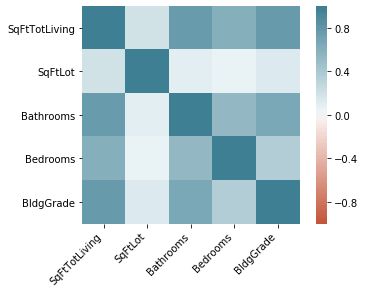

In [71]:
corr = house[predictors].corr()
print("Correlation Matrix \n {}".format(corr))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 2 - Model Selection and Stepwise Regression

In [72]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

print(house[predictors].head())

print("\n PropertyType List \n{}".format(house['PropertyType'].value_counts(dropna=False)))

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

print("\nPredictors after nominal varibale(s) treatment: {} \n\n".format(X.shape))

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

       SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade   PropertyType  \
5947            1680     7477       2.25         3          8  Single Family   
10404           2181     5970       2.50         4          8  Single Family   
3544            2110     7210       2.25         4          8  Single Family   
26163           2390    37376       2.75         4          8  Single Family   
13934           2580     5514       2.75         4          7  Single Family   

       NbrLivingUnits  SqFtFinBasement  YrBuilt  YrRenovated  NewConstruction  
5947                1                0     1988            0            False  
10404               1                0     2006            0             True  
3544                1                0     1978            0            False  
26163               1              900     1980            0            False  
13934               1              770     1971            0            False  

 PropertyType List 
Single Family    1

We can use the `stepwise_selection` method from the _dmba_ package.

In [73]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print() #空行而已
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=518016.85, constant
Step: score=505914.80, add SqFtTotLiving
Step: score=504160.89, add BldgGrade
Step: score=502103.26, add YrBuilt
Step: score=501723.57, add Bedrooms
Step: score=501612.19, add Bathrooms
Step: score=501543.93, add PropertyType_Townhouse
Step: score=501543.93, unchanged None

Intercept: 6148513.652
Coefficients:
 SqFtTotLiving: 208.0306730263227
 BldgGrade: 133579.06601597992
 YrBuilt: -3525.977423841972
 Bedrooms: -51554.65345197103
 Bathrooms: 35185.35393529054
 PropertyType_Townhouse: 66321.8201243456


## 3 - Weighted regression
For the house data recent sale price is more relavent for future prediction, old sale data is less reliable, therefore, we like to emphasis the recent sale data by apply more weight. We will use year the house sale to 2005 as weight.

We can calculate the Year from the date column using either a list comprehension or the data frame's `apply` method.

In [74]:
print("\nDocumentDate List \n{}".format(house['DocumentDate'].value_counts(dropna=False)))


DocumentDate List 
2006-04-25    50
2006-07-26    48
2006-08-24    46
2006-05-22    45
2006-06-28    45
2006-07-18    44
2006-06-19    43
2006-06-08    43
2006-06-21    42
2006-07-24    42
2006-06-13    40
2006-08-21    39
2006-05-23    39
2006-04-26    39
2006-08-29    39
2006-05-01    39
2006-04-05    39
2006-05-25    38
2006-05-30    38
2006-02-22    38
2006-08-25    38
2006-06-01    38
2006-03-01    38
2006-06-15    37
2006-02-21    37
2006-07-11    37
2006-06-14    37
2006-03-20    37
2006-08-23    36
2006-06-12    36
              ..
2012-09-04     1
2014-12-10     1
2009-03-08     1
2006-09-16     1
2014-06-25     1
2015-04-01     1
2010-11-20     1
2012-08-24     1
2012-12-10     1
2014-02-26     1
2009-07-03     1
2013-03-06     1
2015-01-08     1
2011-01-10     1
2015-01-02     1
2013-11-12     1
2010-04-25     1
2013-11-15     1
2015-01-16     1
2006-11-19     1
2012-03-05     1
2013-12-20     1
2012-10-24     1
2015-03-29     1
2013-01-18     1
2006-12-16     1
2013-12-24 

In [75]:
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
5947,2009-10-13,425000,1954410300,Single Family,2009-10-01,351200,0.806985,526651.0,1,7477,...,2.25,3,8,1988,0,0,255000,220000,98074,False
10404,2006-07-14,434700,3275910040,Single Family,2006-07-01,407700,0.936811,464021.0,1,5970,...,2.50,4,8,2006,0,0,104000,254000,98001,True
3544,2012-07-13,224750,1310970500,Single Family,2012-07-01,325300,0.747472,300680.0,1,7210,...,2.25,4,8,1978,0,0,95000,169000,98032,False
26163,2007-06-15,493000,9485930400,Single Family,2007-06-01,433200,0.995404,495276.0,1,37376,...,2.75,4,8,1980,0,0,135000,216000,98042,False
13934,2009-06-25,720000,4077800070,Single Family,2009-06-01,357100,0.820542,877468.0,1,5514,...,2.75,4,7,1971,0,0,359000,398000,98125,False


In [76]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]  #list comprehension
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))  # apply()
house['Weight'] = house.Year - 2005 #dynamic weight

/Users/siyuandong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/siyuandong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/siyuandong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [77]:
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Year,Weight
5947,2009-10-13,425000,1954410300,Single Family,2009-10-01,351200,0.806985,526651.0,1,7477,...,8,1988,0,0,255000,220000,98074,False,2009,4
10404,2006-07-14,434700,3275910040,Single Family,2006-07-01,407700,0.936811,464021.0,1,5970,...,8,2006,0,0,104000,254000,98001,True,2006,1
3544,2012-07-13,224750,1310970500,Single Family,2012-07-01,325300,0.747472,300680.0,1,7210,...,8,1978,0,0,95000,169000,98032,False,2012,7
26163,2007-06-15,493000,9485930400,Single Family,2007-06-01,433200,0.995404,495276.0,1,37376,...,8,1980,0,0,135000,216000,98042,False,2007,2
13934,2009-06-25,720000,4077800070,Single Family,2009-06-01,357100,0.820542,877468.0,1,5514,...,7,1971,0,0,359000,398000,98125,False,2009,4


In [78]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)
pd.DataFrame({
    'predictor': predictors,
    'house_lm': house_lm.coef_,
    'house_wt': house_wt.coef_,
}).append({
    'predictor': 'intercept', 
    'house_lm': house_lm.intercept_,
    'house_wt': house_wt.intercept_,
}, ignore_index=True)

,predictor,house_lm,house_wt
0,SqFtTotLiving,232.996101,245.019483
1,SqFtLot,-0.044389,-0.239152
2,Bathrooms,-24707.405336,-31708.832665
3,Bedrooms,-47799.183730,-51735.577471
4,BldgGrade,104525.562667,115502.335518
5,intercept,-507334.150810,-581982.222221


       abs_residual_lm  abs_residual_wt  Year
5947       5668.312203      1321.554296  2009
10404    119783.593840    124760.823773  2006
3544     272703.679307    278336.099708  2012
26163    129653.837571    129276.868732  2007
13934    311380.134467    314243.892622  2009


Year   Abs_residual_lm    Abs_residual_wt
2006 140939.21482123676 146573.9502304077
2007 146975.93320974286 151699.235647027
2008 143298.48448744873 147363.77657027615
2009 147553.56445120994 151471.4969032259
2010 153050.02345132537 155932.95930690126
2011 163369.89853108636 166570.75225876778
2012 170567.81392259456 172696.99827507575
2013 205296.673700608 207460.52434796595
2014 188397.0136066667 189724.22076578054
2015 171864.83494665005 168903.20849852837


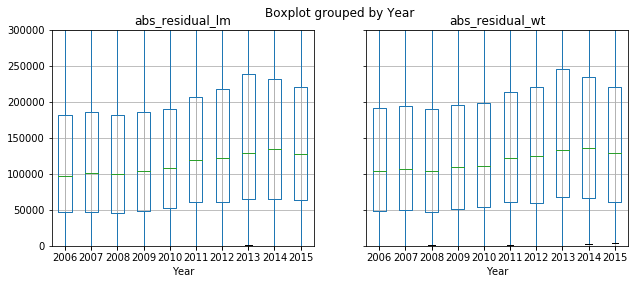

In [79]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(10, 4))
axes[0].set_ylim(0, 300000)

print("\n\nYear   Abs_residual_lm    Abs_residual_wt")
for year, group in residuals.groupby('Year'):
    print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

Seems only help 2015 prediction reduce the residuale.If we have a recent holdout sample we can test the weight could help for furture prediction or not

# 4 - Regularization

In [80]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

outcome = 'AdjSalePrice'

print(house[predictors].head())

print("\n PropertyType List \n{}".format(house['PropertyType'].value_counts(dropna=False)))

X_train = pd.get_dummies(house[predictors], drop_first=True)
X_train['NewConstruction'] = [1 if nc else 0 for nc in X_train['NewConstruction']]
y_train = house[outcome]

X_test = pd.get_dummies(house_test[predictors], drop_first=True)
X_test['NewConstruction'] = [1 if nc else 0 for nc in X_test['NewConstruction']]
y_test = house_test[outcome]

       SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade   PropertyType  \
5947            1680     7477       2.25         3          8  Single Family   
10404           2181     5970       2.50         4          8  Single Family   
3544            2110     7210       2.25         4          8  Single Family   
26163           2390    37376       2.75         4          8  Single Family   
13934           2580     5514       2.75         4          7  Single Family   

       NbrLivingUnits  SqFtFinBasement  YrBuilt  YrRenovated  NewConstruction  
5947                1                0     1988            0            False  
10404               1                0     2006            0             True  
3544                1                0     1978            0            False  
26163               1              900     1980            0            False  
13934               1              770     1971            0            False  

 PropertyType List 
Single Family    1

### Regular Multiple Regression

In [81]:
house_lm = LinearRegression()
house_lm.fit(X_train, y_train)

mlr_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((house_lm.intercept_, house_lm.coef_), 
                                axis=None), 3))
)

mlr_coefs

{'Intercept': 6056760.733,
 'SqFtTotLiving': 205.344,
 'SqFtLot': 0.081,
 'Bathrooms': 35930.065,
 'Bedrooms': -51473.676,
 'BldgGrade': 134263.922,
 'NbrLivingUnits': 17440.038,
 'SqFtFinBasement': 5.921,
 'YrBuilt': -3510.372,
 'YrRenovated': -4.836,
 'NewConstruction': -5967.08,
 'PropertyType_Single Family': 40466.571}

In [82]:
fitted_test = house_lm.predict(X_test)
MSE_test = np.sqrt(mean_squared_error(y_test, fitted_test))
r2 = r2_score(y_test, fitted_test)
print(f'regular mlr MSE: {MSE_test:.0f}')
print(f'r2_test: {r2:.4f}')

regular mlr MSE: 257688
r2_test: 0.5853


### L2 - Ridge regression (Parameter shrinkage)

In [83]:
ridge_cv = RidgeCV(normalize=True, alphas=np.logspace(-10, 1, 400))
ridge_model = ridge_cv.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
ridge_mae = np.mean(np.abs(y_test - ridge_prediction))
ridge_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((ridge_model.intercept_, ridge_model.coef_), 
                                axis=None), 3))
)

print('Ridge Regression MAE: {}'.format(np.round(ridge_mae, 3)))
print('Ridge Regression coefficients:')
ridge_coefs

Ridge Regression MAE: 137944.922
Ridge Regression coefficients:


{'Intercept': 5937098.438,
 'SqFtTotLiving': 200.405,
 'SqFtLot': 0.093,
 'Bathrooms': 37491.218,
 'Bedrooms': -49996.469,
 'BldgGrade': 134180.512,
 'NbrLivingUnits': 9306.181,
 'SqFtFinBasement': 9.016,
 'YrBuilt': -3437.124,
 'YrRenovated': -3.643,
 'NewConstruction': -5910.769,
 'PropertyType_Single Family': 25580.297}

### L1 - Lasso regression (Parameter sparsity)

In [84]:
lasso_cv = LassoCV(normalize=True, alphas=np.logspace(-10, 1, 400))
lasso_model = lasso_cv.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_mae = np.mean(np.abs(y_test - lasso_prediction))
lasso_coefs = dict(
    zip(['Intercept'] + X_train.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model.intercept_, lasso_model.coef_), axis=None), 3))
)

print('LASSO MAE: {}'.format(np.round(lasso_mae, 3)))
print('LASSO coefficients:')
lasso_coefs

/Users/siyuandong/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LASSO MAE: 137896.134
LASSO coefficients:


{'Intercept': 5844059.296,
 'SqFtTotLiving': 202.358,
 'SqFtLot': 0.045,
 'Bathrooms': 31939.597,
 'Bedrooms': -47844.276,
 'BldgGrade': 134031.936,
 'NbrLivingUnits': -0.0,
 'SqFtFinBasement': 6.39,
 'YrBuilt': -3370.897,
 'YrRenovated': -0.0,
 'NewConstruction': -998.078,
 'PropertyType_Single Family': -0.0}

# Home Work

1. Compare the three model fits and draw conclusion 
from the comparision of the three model firt regarding there coefficent difference

By introducing shrinkage penalty, both ridge regression and Laaso show better performances than regular multiple regression. Lasso can force coefficients of those insignificant varables to zero. Lasso and ridge regression coefficient estimates are given by the first point at which an ellipse contacts the constraint region. Lasso's regression constraints are in a diamond while ridge regression's constrains are in a circle. Since ridge regression has a circular constraint with no sharp points, the intersection will not generally occur on an axis. So, the ridge regression coefficient estimates will be exclusively non-zero. However, lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis. When this occurs, one of the coefficients will equal zero. 

2. Show the three model performance on both train and test

### Performance of Regular Multiple Regression 

In [89]:
fitted_test_train = house_lm.predict(X_train)
MSE_train = np.sqrt(mean_squared_error(y_train, fitted_test_train))
r2 = r2_score(y_train, fitted_test_train)
print(f'regular mlr MSE: {MSE_train:.0f}')
print(f'r2_test: {r2:.4f}')

regular mlr MSE: 242270
r2_test: 0.5970


In [90]:
fitted_test = house_lm.predict(X_test)
MSE_test = np.sqrt(mean_squared_error(y_test, fitted_test))
r2 = r2_score(y_test, fitted_test)
print(f'regular mlr MSE: {MSE_test:.0f}')
print(f'r2_test: {r2:.4f}')

regular mlr MSE: 257688
r2_test: 0.5853


### Performance of Ridge Regression

In [97]:
ridge_prediction = ridge_model.predict(X_train)
MSE_train = np.sqrt(mean_squared_error(y_train, ridge_prediction))
r2 = r2_score(y_train, ridge_prediction)
print(f'ridge MSE: {MSE_train:.0f}')
print(f'r2_train: {r2:.4f}')

ridge MSE: 242288
r2_test: 0.5969


In [98]:
ridge_prediction = ridge_model.predict(X_test)
MSE_test = np.sqrt(mean_squared_error(y_test, ridge_prediction))
r2 = r2_score(y_test, ridge_prediction)
print(f'ridge MSE: {MSE_test:.0f}')
print(f'r2_test: {r2:.4f}')

ridge MSE: 257662
r2_test: 0.5854


### Performance of Lasso

In [96]:
lasso_prediction = lasso_model.predict(X_train)
MSE_train = np.sqrt(mean_squared_error(y_train, lasso_prediction))
r2 = r2_score(y_train, lasso_prediction)
print(f'lasso mlr MSE: {MSE_train:.0f}')
print(f'r2_train: {r2:.4f}')

regular mlr MSE: 242339
r2_test: 0.5967


In [99]:
lasso_prediction = lasso_model.predict(X_test)
MSE_test = np.sqrt(mean_squared_error(y_test, lasso_prediction))
r2 = r2_score(y_test, lasso_prediction)
print(f'lasso MSE: {MSE_test:.0f}')
print(f'r2_test: {r2:.4f}')

lasso MSE: 257791
r2_test: 0.5849
